**KELOMPOK 13**

* Syahel Rusfi Razaba (11210940000048)
* Khansa Azzahra (11210940000064)
* Mentari Syahida (11210940000069)
* Tonny Pramudya Bagus Santoso (11210940000073)
*  Sifha Desti Wulandari (11210940000078)
* Bagas Dwi Firmansyah (11210940000080)
* Selvi Oktaviani (11210940000081)


**1. Import Data**

Data diakses dari github, lalu di sambungkan ke google colabs menggunakan fungsi pd.read_csv, data yang diakses ada beberapa kota yaitu kota Jakarta, Bogor, dan Bekasi.

In [1]:
# Loading Data:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
try: # Running Locally, yakinkan "file_" berada di folder "data"
    jakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    bogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    bekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bekasi.csv
    jakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    bogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    bekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
jakarta.shape, bogor.shape, bekasi.shape

((1024, 26), (999, 26), (992, 26))

Terdapat hasil jumlah data baris dan kolom data yang belum dibersihkan dan dirapikan. Yaitu 1024 baris dan 26 kolom untuk kota Jakarta, 999 baris dan 26 kolom untuk kota Bogor, dan 992 baris dan 26 kolom untuk kota Bekasi.

In [2]:
jakarta = pd.DataFrame(jakarta)
bogor = pd.DataFrame(bogor)
bekasi = pd.DataFrame(bekasi)

In [3]:
jakarta.info(), bogor.info(), bekasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

(None, None, None)

In [4]:
jakarta.describe().transpose(), 

(             count          mean           std          min           25%  \
 LT           121.0  2.475868e+02  3.683846e+02         16.0  8.400000e+01   
 LB           121.0  2.794959e+02  2.852756e+02         21.0  9.700000e+01   
 KT           121.0  4.272727e+00  1.901754e+00          1.0  3.000000e+00   
 KM           121.0  3.380165e+00  1.709075e+00          1.0  2.000000e+00   
 garasi        44.0  1.863636e+00  1.518734e+00          1.0  1.000000e+00   
 carport       90.0  1.955556e+00  1.475730e+00          1.0  1.000000e+00   
 listrik      120.0  5.425000e+03  7.891590e+03        900.0  2.200000e+03   
 harga        121.0  8.985955e+09  1.587610e+10  380000000.0  1.600000e+09   
 Unnamed: 14    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 15    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 16    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 17    0.0           NaN           NaN          NaN    

In [5]:
bogor.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,193.0,1.435751e+02,1.915762e+02,30.0,66.0,84.0,1.200000e+02,1.500000e+03
LB,193.0,9.866321e+01,1.258517e+02,21.0,36.0,58.0,9.000000e+01,1.200000e+03
KT,193.0,2.694301e+00,1.110939e+00,1.0,2.0,2.0,3.000000e+00,8.000000e+00
KM,193.0,1.797927e+00,1.175087e+00,1.0,1.0,1.0,2.000000e+00,6.000000e+00
garasi,193.0,1.554404e-01,4.859312e-01,0.0,0.0,0.0,0.000000e+00,3.000000e+00
carport,193.0,1.310881e+00,9.052715e-01,0.0,1.0,1.0,1.000000e+00,8.000000e+00
listrik,193.0,2.076166e+03,1.562634e+03,900.0,1300.0,1300.0,2.200000e+03,1.760000e+04
harga,193.0,1.289362e+09,2.115854e+09,65000000.0,399000000.0,670000000.0,1.250000e+09,1.650000e+10
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bekasi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,107.0,1.088224e+02,5.916491e+01,36.0,72.0,91.0,1.305000e+02,3.640000e+02
LB,107.0,1.106355e+02,7.175527e+01,30.0,60.0,90.0,1.440000e+02,4.940000e+02
KT,107.0,2.962617e+00,1.027226e+00,1.0,2.0,3.0,4.000000e+00,7.000000e+00
KM,106.0,1.943396e+00,8.488669e-01,1.0,1.0,2.0,2.750000e+00,4.000000e+00
garasi,33.0,1.090909e+00,2.919371e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
carport,81.0,1.086420e+00,2.827336e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
listrik,101.0,2.056436e+03,9.695789e+02,900.0,1300.0,2200.0,2.200000e+03,5.500000e+03
harga,107.0,1.074823e+09,7.516152e+08,160000000.0,580500000.0,920000000.0,1.350000e+09,4.500000e+09
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melakukan statistika deskriptif masing masing kota untuk menggambarkan jumlah, rata rata, standar deviasi, kuartil 1, 2, dan 3, minimal serta maksimal. Masing masing komponen mmemberikan gambaran mengenai variabel atau data yang digunakan dan diproses.

**2. Data Prepocessing**

In [7]:
#menghapus kolom yang berisi data NaN
jakarta.drop(["created_at", "hadap", "Unnamed: 14",'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [8]:
bogor.drop(["created_at", "hadap","Unnamed: 14",'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [9]:
bekasi.drop(["created_at", "hadap","Unnamed: 14",'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [10]:
jakarta.drop_duplicates(inplace = True)
print(jakarta.shape)
jakarta.duplicated().sum()

(122, 12)


0

In [11]:
jakarta.isnull().sum()

LT             1
LB             1
KT             1
KM             1
garasi        78
carport       32
lokasi         1
sertifikat     3
listrik        2
harga          1
URL            1
deskripsi     10
dtype: int64

In [12]:
bogor.drop_duplicates(inplace = True)
print(bogor.shape)
bogor.duplicated().sum()

(194, 12)


0

In [13]:
bogor.isnull().sum()

LT            1
LB            1
KT            1
KM            1
garasi        1
carport       1
lokasi        1
sertifikat    1
listrik       1
harga         1
URL           1
deskripsi     1
dtype: int64

In [14]:
bekasi.drop_duplicates(inplace = True)
print(bekasi.shape)
bekasi.duplicated().sum()

(108, 12)


0

In [15]:
bekasi.isnull().sum()

LT             1
LB             1
KT             1
KM             2
garasi        75
carport       27
lokasi         1
sertifikat     2
listrik        7
harga          1
URL            1
deskripsi      1
dtype: int64

Untuk merapikan data yang berisikan NaN kita menghapus kolom yang berisikan data NaN dengan menggunakan fungsi drop_duplicates. Selanjutnya kita menggunakan fungsi isnull().sum() untuk merubah data Nan menjadi 0

In [16]:
null = jakarta["KT"].isnull()
jakarta["KT"] = jakarta["KT"].replace(np.nan, 0)
null = jakarta["KM"].isnull()
jakarta["KM"] = jakarta["KM"].replace(np.nan, 0)
null = jakarta["garasi"].isnull()
jakarta["garasi"] = jakarta["garasi"].replace(np.nan, 0)
null = jakarta["carport"].isnull()
jakarta["carport"] = jakarta["carport"].replace(np.nan, 0)
null = jakarta["listrik"].isnull()
jakarta["listrik"] = jakarta["listrik"].replace(np.nan, 0)


mean = jakarta["LB"].mean()
jakarta["LB"] = jakarta["LB"].replace(np.nan, mean)
mean = jakarta["LT"].mean()
jakarta["LT"] = jakarta["LT"].replace(np.nan, mean)
mean = jakarta["harga"].mean()
jakarta["harga"] = jakarta["harga"].replace(np.nan, mean)


jakarta

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,202.000000,198.000000,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,30.000000,55.000000,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,19.000000,35.000000,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,33.000000,42.000000,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,30.000000,55.000000,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...
117,70.000000,57.000000,3.0,2.0,0.0,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\r\n• 2 Men...
118,315.000000,280.000000,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,135.000000,190.000000,5.0,5.0,0.0,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,144.000000,250.000000,5.0,5.0,0.0,2.0,Jakarta Timur,SHM,3500.0,2.250000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [17]:
null = bogor["KT"].isnull()
bogor["KT"] = bogor["KT"].replace(np.nan, 0)
null = bogor["KM"].isnull()
bogor["KM"] = bogor["KM"].replace(np.nan, 0)
null = bogor["garasi"].isnull()
bogor["garasi"] = bogor["garasi"].replace(np.nan, 0)
null = bogor["carport"].isnull()
bogor["carport"] = bogor["carport"].replace(np.nan, 0)
null = bogor["listrik"].isnull()
bogor["listrik"] = bogor["listrik"].replace(np.nan, 0)


mean = bogor["LB"].mean()
bogor["LB"] = bogor["LB"].replace(np.nan, mean)
mean = bogor["LT"].mean()
bogor["LT"] = bogor["LT"].replace(np.nan, mean)
mean = bogor["harga"].mean()
bogor["harga"] = bogor["harga"].replace(np.nan, mean)


bogor

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,75.00000,38.000000,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,6.925500e+08,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,60.00000,40.000000,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,8.114000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,60.00000,50.000000,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,9.005000e+08,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,60.00000,70.000000,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,1.001900e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,90.00000,60.000000,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,1.200800e+09,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...
189,107.00000,31.000000,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,210.00000,150.000000,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,90.00000,36.000000,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"
192,72.00000,90.000000,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,9.000000e+08,https://www.rumah.com/listing-properti/dijual-...,"Nyaman, aman, swimming pool"


In [18]:
null = bekasi["KT"].isnull()
bekasi["KT"] = bekasi["KT"].replace(np.nan, 0)
null = bekasi["KM"].isnull()
bekasi["KM"] = bekasi["KM"].replace(np.nan, 0)
null = bekasi["garasi"].isnull()
bekasi["garasi"] = bekasi["garasi"].replace(np.nan, 0)
null = bekasi["carport"].isnull()
bekasi["carport"] = bekasi["carport"].replace(np.nan, 0)
null = bekasi["listrik"].isnull()
bekasi["listrik"] = bekasi["listrik"].replace(np.nan, 0)


mean = bekasi["LB"].mean()
bekasi["LB"] = bekasi["LB"].replace(np.nan, mean)
mean = bekasi["LT"].mean()
bekasi["LT"] = bekasi["LT"].replace(np.nan, mean)
mean = bekasi["harga"].mean()
bekasi["harga"] = bekasi["harga"].replace(np.nan, mean)


bekasi

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,71.00000,43.000000,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,59.00000,60.000000,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,124.00000,95.000000,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,0.0,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,144.00000,100.000000,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,108.00000,100.000000,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,140.00000,250.000000,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,60.00000,55.000000,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,36.00000,60.000000,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,60.00000,55.000000,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


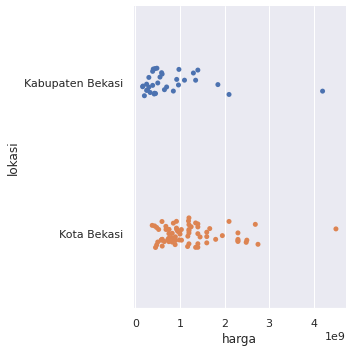

In [19]:
p = sns.catplot(x="harga", y="lokasi", data=bekasi)

Interpretasi:

Berdasarkan data diatas, kita dapat lihat bahwa kecenderungan harga rumah dilokasi kabupaten Bekasi dengan kota Bekasi kurang lebih sama, namun ada yang menarik perhatian di outliernya dengan harga sekitar 4 miliar, hal tersebut menuntut untuk diobservasi lebih lanjut mengapa harga tersebut bisa mahal. Setelah kita tahu dengan melakukan survey, kita bisa menyimpulkan apakah layak atau tidak untuk diinvestasikan. Karena bisa jadi rumah tersebut spesial atau sebagainya, oleh sebab itu akan mendapat keuntungan jika kita bisa berinvestasi dengan rumah tersebut.

Lalu ada yang menarik lagi dengan harga rumah yang rendah dengan rentang dibawah 1 miliar baik itu di kabupaten Bekasi maupun di kota Bekasi. Hal ini juga mesti diobservasi lebih lanjut karena dikhawatirkan rumah tersebut kurang baik atau semacamnya, jadi tidak menguntungkan bila berinvestasi dengan rumah tersebut.

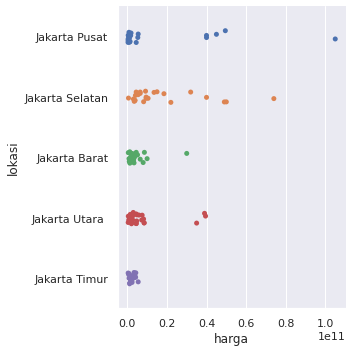

In [20]:
p = sns.catplot(x="harga", y="lokasi", data=jakarta)

interpretasi:

Pada hasil visualiasasi data diatas, dapat dilihat bahwa daerah yang memiliki rata rata harga paling murah terdapat pada kota jakarta timur. Sehingga perusahaan dapat menginvestasikan perumahan tersebut karena modal awal rumah yang lebih murah. 
Selain itu terdapat beberapa outlier yang mungkin perusahaan dapat menginvestasikan dananya disana, untuk mencegah kalau investasi di jakarta timur tidak mendapatkan keuntungan sesuai target perusahaan.
Tetapi perusahaan perlu mensurvey kembali alasan rumah tersebut harganya cenderung murah, karena dikhawatirkan rumah tersebut kurang layak untuk diinvestasikan sehingga diperlukan data data lain, seperti daerah sekitar sana rawan banjir atau bencana sehingga rumah tersebut dijual dalam harga murah.

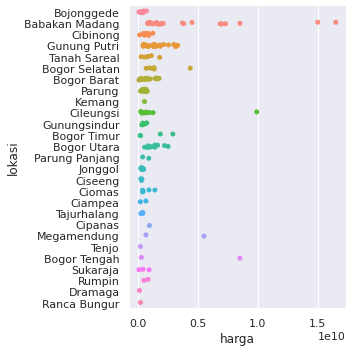

In [21]:
p = sns.catplot(x="harga", y="lokasi", data=bogor)

Pada hasil visualisasi data diatas, dapat disimpulkan bahwa daerah di kota Bogor rata rata memiliki harga rumah yg cukup murah, tetapi rumah dengan harga terjangkau masih menjadi pilihan kedua. Namun terdapat harga rumah yang terjual mahal. Menurut kami, perusahaan perlu mensurvey kembali alasan rumah tersebut harganya cenderung murah, karena seperti kita ketahui bahwa bogor merupakan kota hujan dan rawan bajir / bencana. 

Kesimpulan: 

berdasarkan data visualisasi pertama, dapat dilihat bahwa kecenderungan harga rumah di lokasi kabupaten Bekasi dengan kota Bekasi kurang lebih sama, dan terdapat hal menarik dengan harga rumah yg rendah dengan rentang dibawah 1 miliar baik itu di kabupaten Bekasi maupun di kota Bekasi.
berdasarkan data visualisasi kedua, bahwa daerah yg memiliki rata rata harga paling murah terdapat pada kota Jakarta timur, selain itu terdapat beberapa outlier yg mungkin perusahaan dapat menginvestasikan dananya di sana untuk mencegah kalau investasi di Jakarta timur tidak mendapat keuntungan sesuai target perusahaan.
Sedangkan berdasarkan data visualisasi terakhir, dapat disimpulkan bahwa daerah di kota Bogor rata rata memiliki harga rumah yg cukup murah.
Dari ketiga kesimpulan tersebut, kami dapat mensurvei kembali alasan perumahan tersebut murah, agar layak untuk dihuni